In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [2]:
Export = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
Export = Export[Export['Reporter Name'].isin(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])]
Export = Export[Export['Partner Name'].isin(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])]
Export['mean']=Export.mean(axis=1)
Export_net = nx.from_pandas_edgelist(Export, source = 'Reporter Name', target = 'Partner Name', edge_attr = 'mean',create_using = nx.DiGraph())
Export

Export_pivot=pd.pivot_table(Export,index='Reporter Name',columns='Partner Name',values='mean')
Export_pivot=Export_pivot.fillna(0)
Export_csr_mat = csr_matrix(Export_pivot)
Export_csr_mat


<43x43 sparse matrix of type '<class 'numpy.float64'>'
	with 1807 stored elements in Compressed Sparse Row format>

In [3]:
Export=pd.DataFrame([Export['Reporter Name'],Export['Partner Name'],Export['mean']])
Export=Export.transpose()

In [4]:
Export

,Reporter Name,Partner Name,mean
10,Slovenia,Argentina,0.0558792
13,Slovenia,Australia,0.221475
14,Slovenia,Austria,7.65707
21,Slovenia,Belgium,1.13039
32,Slovenia,Brazil,0.154746
...,...,...,...
11615,Ukraine,Sweden,0.115696
11616,Ukraine,Switzerland,0.656804
11625,Ukraine,Turkey,5.75305
11631,Ukraine,United Kingdom,1.07502


In [5]:
Export.to_csv('./data/cyto_trans.csv')

In [6]:
Export_net.degree

DiDegreeView({'Slovenia': 84, 'Argentina': 84, 'Australia': 84, 'Austria': 84, 'Belgium': 84, 'Brazil': 86, 'Bulgaria': 84, 'Canada': 84, 'Chile': 84, 'China': 84, 'Czech Republic': 84, 'Denmark': 84, 'Estonia': 84, 'Finland': 84, 'France': 84, 'Germany': 84, 'Greece': 84, 'Hungary': 84, 'India': 84, 'Indonesia': 84, 'Ireland': 86, 'Israel': 84, 'Italy': 84, 'Japan': 84, 'Korea, Rep.': 84, 'Latvia': 84, 'Lithuania': 84, 'Mexico': 84, 'Netherlands': 84, 'New Zealand': 84, 'Norway': 84, 'Poland': 84, 'Portugal': 84, 'Russian Federation': 84, 'Slovak Republic': 84, 'South Africa': 84, 'Spain': 84, 'Sweden': 84, 'Switzerland': 84, 'Turkey': 84, 'Ukraine': 84, 'United Kingdom': 84, 'United States': 84})

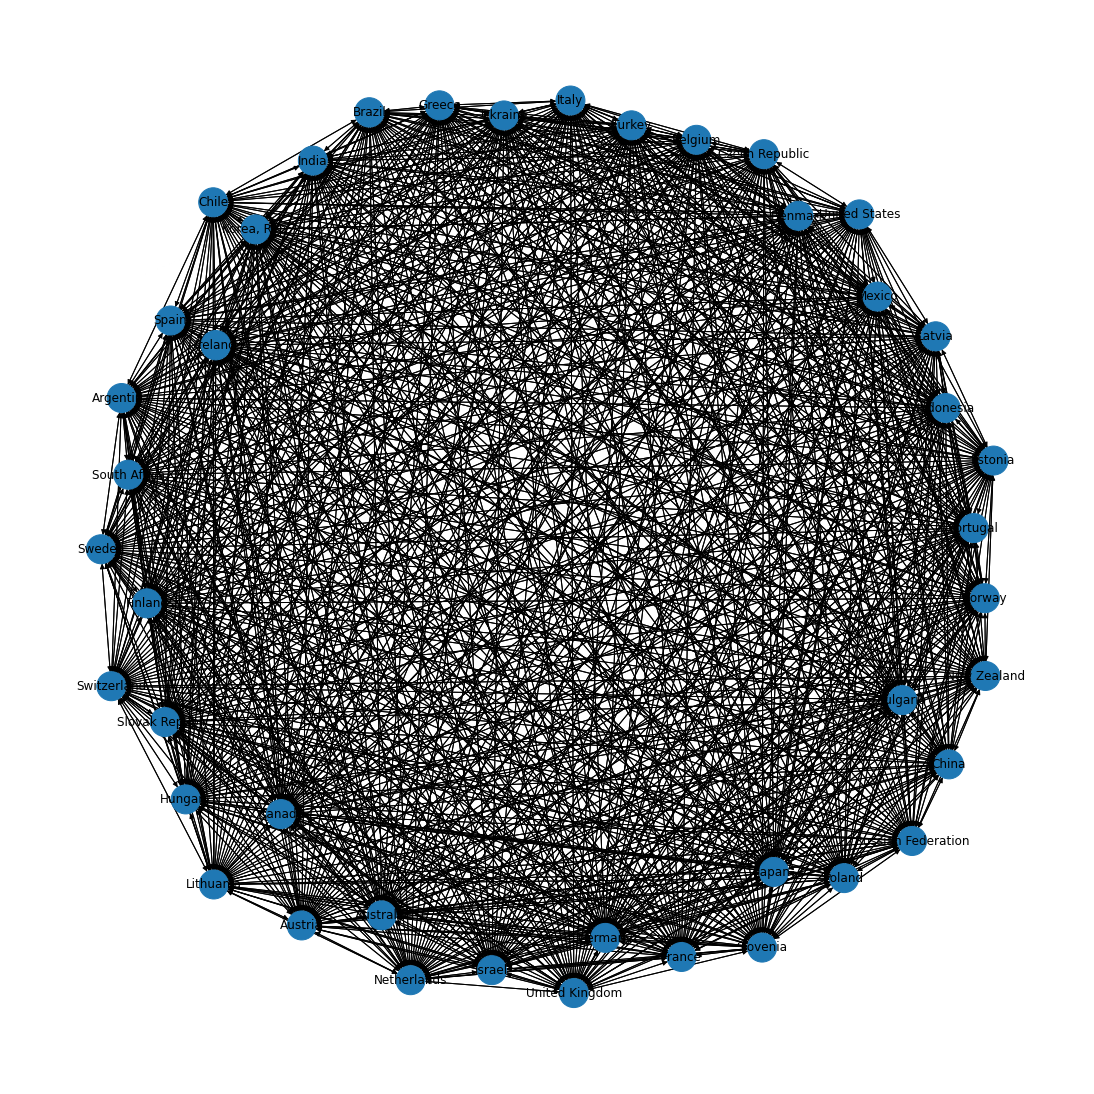

In [7]:
d = dict(Export_net.degree)
plt.figure(figsize=(15,15))
pos = nx.spring_layout(Export_net,10)
nx.draw(Export_net, pos, node_size = [v * 10 for v in d.values()], with_labels = True)
plt.show()

In [8]:

Export_pivot

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.509862,0.022204,0.736785,21.023919,0.084958,1.262442,7.349188,5.737308,0.046742,...,0.007656,0.044072,1.191167,3.398777,0.105915,0.814515,0.548796,0.068736,1.196369,8.428827
Australia,0.093342,0.000000,0.034281,0.596035,0.443177,0.025435,0.851039,0.135394,13.732445,0.050138,...,0.003696,0.010204,0.716000,0.410232,0.197703,0.420923,0.287355,0.031044,3.416390,6.231229
Austria,0.105400,0.558916,0.000000,1.439430,0.480792,0.436920,0.724052,0.085608,1.594112,3.240044,...,1.649688,1.881124,0.392280,2.176724,1.128920,5.371824,0.816680,0.415952,3.523008,5.043844
Belgium,0.123175,0.461175,1.014435,0.000000,0.607665,0.121460,0.612255,0.092815,1.427895,0.724720,...,0.226855,0.134635,0.368935,3.199350,1.470855,1.386380,1.097630,0.158565,8.310530,5.768185
Brazil,8.047203,0.431197,0.139043,2.094330,0.000000,0.094887,1.264547,2.289603,8.451400,0.042908,...,0.044300,0.124374,0.703910,1.889200,0.338217,0.663440,0.506310,0.130695,2.384007,17.528947
Bulgaria,0.065913,0.094870,1.761400,4.798070,0.188257,0.000000,0.407600,0.033017,1.188870,0.912287,...,0.513643,0.622722,0.172100,2.705883,0.550243,0.768143,8.975217,1.694009,2.376065,2.581139
Canada,0.060437,0.403273,0.085233,0.565375,0.400500,0.016260,0.000000,0.131980,2.145653,0.029792,...,0.008016,0.012025,0.104993,0.244333,0.114667,0.303167,0.138943,0.024373,2.406403,79.434097
Chile,2.513586,0.520400,0.064517,1.380065,5.149683,0.380662,1.490200,0.000000,12.531114,0.009740,...,0.001540,0.004392,0.294262,2.271800,0.499821,0.564441,0.377983,0.019071,3.450679,14.751445
China,0.272756,1.475030,0.117244,0.877090,0.868367,0.047544,1.300678,0.399000,0.000000,0.266138,...,0.070054,0.055188,0.523044,0.924678,0.323563,0.235063,0.542011,0.215933,2.348019,18.673348


In [9]:
import os
import sys
import scipy as sp
import scipy.sparse as sparse
from numpy.testing import assert_allclose
import unittest
from fast_pagerank import pagerank
from fast_pagerank import pagerank_power
pr=pagerank(Export_csr_mat,p=0.85)
pr

array([0.00743066, 0.01428887, 0.01673181, 0.03402059, 0.01412907,
       0.00560447, 0.04209329, 0.0070431 , 0.04137013, 0.01221014,
       0.01201274, 0.00531165, 0.0106544 , 0.05729798, 0.09943089,
       0.00887319, 0.00976216, 0.01307475, 0.00857074, 0.01136997,
       0.00860331, 0.0425743 , 0.04294682, 0.02235837, 0.00554502,
       0.00585336, 0.0274385 , 0.04313311, 0.00570266, 0.01051806,
       0.0159059 , 0.01047364, 0.02012851, 0.00780767, 0.0056543 ,
       0.00811562, 0.02983226, 0.01739429, 0.02229987, 0.0141939 ,
       0.00754596, 0.05726558, 0.13742841])

In [10]:
c_list=(['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States','Ukraine'])
c_list.sort()
print(c_list)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russian Federation', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States']


In [11]:
import pandas as pd
from pandas import DataFrame

pagerank_arr=np.array(pr)

In [12]:
pagerank_arr

array([0.00743066, 0.01428887, 0.01673181, 0.03402059, 0.01412907,
       0.00560447, 0.04209329, 0.0070431 , 0.04137013, 0.01221014,
       0.01201274, 0.00531165, 0.0106544 , 0.05729798, 0.09943089,
       0.00887319, 0.00976216, 0.01307475, 0.00857074, 0.01136997,
       0.00860331, 0.0425743 , 0.04294682, 0.02235837, 0.00554502,
       0.00585336, 0.0274385 , 0.04313311, 0.00570266, 0.01051806,
       0.0159059 , 0.01047364, 0.02012851, 0.00780767, 0.0056543 ,
       0.00811562, 0.02983226, 0.01739429, 0.02229987, 0.0141939 ,
       0.00754596, 0.05726558, 0.13742841])

,Value
Argentina,0.005045
Australia,0.012826
Austria,0.015393
Belgium,0.036004
Brazil,0.012637
Bulgaria,0.002676
Canada,0.050261
Chile,0.004583
China,0.044176
Czech Republic,0.009945


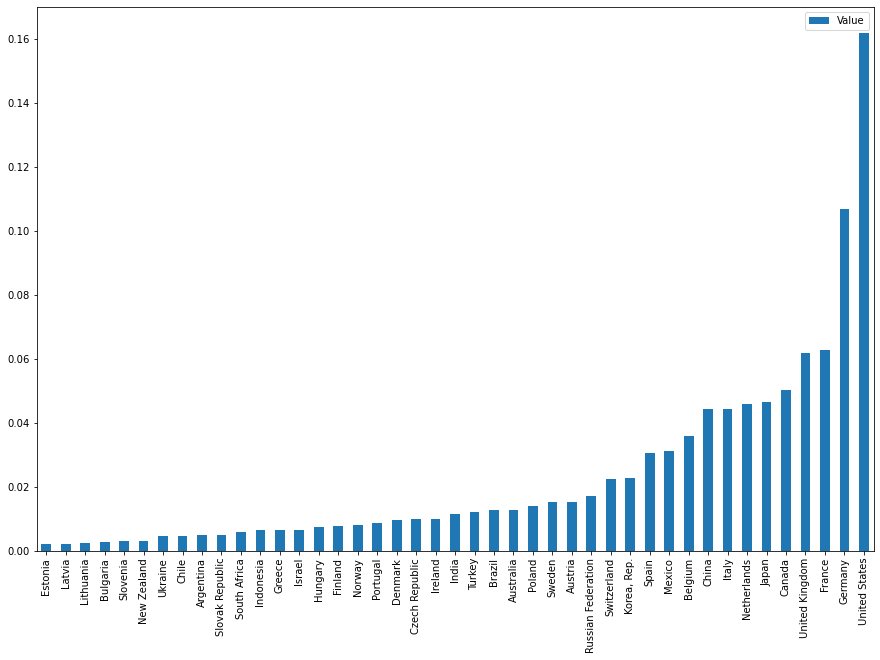

In [13]:
pr=pagerank_power(Export_csr_mat, p=0.85, personalize=pagerank_arr, tol=1e-6)

pagerank = DataFrame(data=pr,index=c_list,columns=['Value'])
pagerank.sort_values(by='Value').plot(kind='bar',figsize=(15,10))
pagerank.to_csv("./data/pagerank.csv")
pagerank

In [14]:
pagerank_pivot=Export_pivot.copy()

for i in (c_list):
    arr2 = np.array(Export_pivot[i])

    pr2=pagerank_power(Export_csr_mat, p=0.85, personalize=arr2, tol=1e-6)

    df2 = DataFrame(data=pr2,index=c_list,columns=['Value'])
    pagerank_pivot.loc[i]=df2['Value']


In [40]:
pagerank_pivot

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.010805,0.011426,0.011789,0.030280,0.084342,0.002300,0.043907,0.028146,0.048065,0.007272,...,0.003744,0.002353,0.007226,0.030369,0.012848,0.019457,0.010014,0.003567,0.050992,0.155407
Australia,0.005408,0.025523,0.012368,0.029621,0.011788,0.001875,0.044345,0.005282,0.052250,0.007282,...,0.003621,0.002443,0.009505,0.024597,0.014818,0.019600,0.009958,0.002980,0.055665,0.152946
Austria,0.003307,0.009027,0.019179,0.034170,0.009192,0.007079,0.033095,0.002961,0.032369,0.027034,...,0.024118,0.022868,0.005048,0.030130,0.016713,0.028573,0.013971,0.007182,0.055731,0.114850
Belgium,0.004730,0.010915,0.015535,0.034568,0.012612,0.008407,0.037808,0.005058,0.036135,0.012036,...,0.006604,0.003732,0.008424,0.031898,0.019794,0.022466,0.013420,0.004714,0.063752,0.131002
Brazil,0.071260,0.011952,0.012303,0.030282,0.027124,0.002330,0.043452,0.025477,0.046692,0.007327,...,0.003480,0.002308,0.007704,0.029147,0.013369,0.019993,0.010315,0.004190,0.051010,0.149922
Bulgaria,0.004389,0.009373,0.020149,0.031621,0.010392,0.005059,0.033777,0.007155,0.034301,0.014555,...,0.009875,0.009087,0.004753,0.030071,0.014240,0.021326,0.026392,0.019890,0.055206,0.117456
Canada,0.007870,0.014331,0.012961,0.030627,0.015469,0.002732,0.053729,0.008173,0.044332,0.007425,...,0.003882,0.002515,0.006479,0.025313,0.014678,0.020487,0.010728,0.003542,0.056021,0.205225
Chile,0.076949,0.012162,0.011211,0.028932,0.049432,0.001939,0.044330,0.010465,0.048151,0.006849,...,0.003308,0.002072,0.006862,0.030001,0.012851,0.018183,0.009904,0.003412,0.049588,0.153451
China,0.010734,0.027109,0.012724,0.029795,0.020964,0.002988,0.044494,0.017001,0.048358,0.007872,...,0.004473,0.002247,0.010087,0.025042,0.014047,0.020242,0.011049,0.007387,0.052668,0.151094


In [42]:
pagerank_pivot.to_csv('./data/pagerank_pivot.csv')

In [34]:
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x)*70/x.sum()))

In [35]:
pagerank_pivot_norm = mean_norm(pagerank_pivot.transpose()).transpose()
Export_pivot_norm = mean_norm(Export_pivot.transpose()).transpose()
pagerank_pivot_norm

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Czech Republic,...,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.756342,0.799848,0.825253,2.119632,5.903971,0.161003,3.073486,1.970224,3.364582,0.509069,...,0.262054,0.164738,0.505841,2.125826,0.899339,1.361980,0.700948,0.249676,3.569451,10.878518
Australia,0.378595,1.786605,0.865781,2.073471,0.825182,0.131250,3.104143,0.369709,3.657477,0.509709,...,0.253437,0.170999,0.665319,1.721783,1.037293,1.371988,0.697031,0.208612,3.896541,10.706218
Austria,0.231493,0.631922,1.342525,2.391933,0.643438,0.495511,2.316658,0.207241,2.265822,1.892408,...,1.688267,1.600739,0.353382,2.109068,1.169894,2.000122,0.977950,0.502722,3.901199,8.039527
Belgium,0.331122,0.764034,1.087473,2.419748,0.882838,0.588522,2.646575,0.354054,2.529466,0.842535,...,0.462297,0.261223,0.589649,2.232872,1.385602,1.572609,0.939380,0.329988,4.462641,9.170115
Brazil,4.988169,0.836664,0.861193,2.119756,1.898687,0.163065,3.041645,1.783367,3.268444,0.512902,...,0.243624,0.161574,0.539266,2.040261,0.935841,1.399509,0.722059,0.293299,3.570678,10.494573
Bulgaria,0.307262,0.656121,1.410411,2.213443,0.727460,0.354111,2.364420,0.500817,2.401067,1.018830,...,0.691216,0.636110,0.332681,2.104994,0.996782,1.492829,1.847450,1.392328,3.864419,8.221907
Canada,0.550885,1.003183,0.907278,2.143887,1.082829,0.191225,3.761060,0.572113,3.103237,0.519725,...,0.271726,0.176065,0.453506,1.771905,1.027478,1.434077,0.750932,0.247919,3.921493,14.365759
Chile,5.386410,0.851356,0.784743,2.025256,3.460260,0.135701,3.103076,0.732573,3.370596,0.479457,...,0.231585,0.145051,0.480358,2.100091,0.899553,1.272815,0.693306,0.238839,3.471140,10.741536
China,0.751389,1.897628,0.890693,2.085655,1.467509,0.209160,3.114563,1.190095,3.385075,0.551016,...,0.313115,0.157324,0.706072,1.752943,0.983303,1.416911,0.773405,0.517058,3.686726,10.576613


[[ 0.75634207  0.79984787  0.82525342 ...  0.24967588  3.56945073
  10.87851781]
 [ 0.37859452  1.7866054   0.86578139 ...  0.20861164  3.89654097
  10.70621822]
 [ 0.23149347  0.63192239  1.34252532 ...  0.50272236  3.90119876
   8.03952667]
 ...
 [ 0.24639978  0.61724885  1.20413186 ...  0.51277982  3.81253011
   7.92500132]
 [ 0.30555361  0.8799918   1.09120461 ...  0.32079651  4.11332048
   9.07750816]
 [ 0.48372749  0.94011467  0.85828267 ...  0.26026509  3.80156215
  12.20888403]]


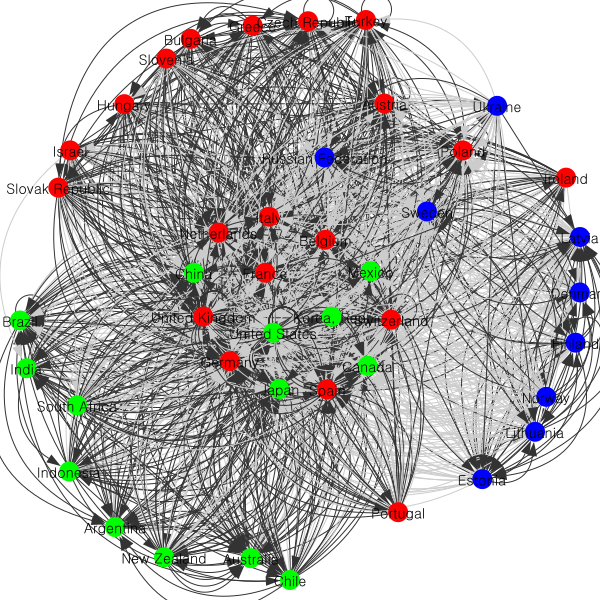

In [36]:
import igraph as ig
import leidenalg as la

A = pagerank_pivot_norm.values
print(A)
G = ig.Graph.Adjacency(A.tolist())
G.es['weight'] = A[A.nonzero()]
G.vs['label'] = pagerank_pivot_norm.index
# compute the best partition
partition = la.find_partition(G, la.ModularityVertexPartition)
#partition = la.find_partition(G, la.CPMVertexPartition,resolution_parameter = .5)
cluster_id = df2
cluster_id['Value']=partition.membership
ig.plot(partition, vertex_color=partition.membership,
            vertex_frame_width=0,
            palette=ig.ClusterColoringPalette(len(set(partition.membership)) + 3))

In [37]:
cluster_id['Value'] = cluster_id['Value'].map({0:'West EU',
                             1:'Asia & America',
                             2:'East EU'})

In [38]:
cluster_id

,Value
Argentina,Asia & America
Australia,Asia & America
Austria,West EU
Belgium,West EU
Brazil,Asia & America
Bulgaria,West EU
Canada,Asia & America
Chile,Asia & America
China,Asia & America
Czech Republic,West EU


In [39]:
cluster_id.to_csv('./data/cluster_id.csv')